<a href="https://colab.research.google.com/github/MichaelAguadze/Logistic-Regression-JAX/blob/main/Logistic_Regression_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import jax.numpy as jnp
from jax.numpy import ndarray
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt

from typing import Callable, Dict, Tuple, List

jnp.set_printoptions(precision=4)
# GRAPHS_IMG_FILEPATH = "/Users/seth/development/01_deep-learning-from-scratch/images/02_fundamentals/graphs/"

In [2]:
%load_ext autoreload
%autoreload 2

MNIST data

In [3]:
from sklearn.datasets import load_digits
mnist = load_digits()
data = mnist.data
target = mnist.target
features = mnist.feature_names

**Examples from the dataset**

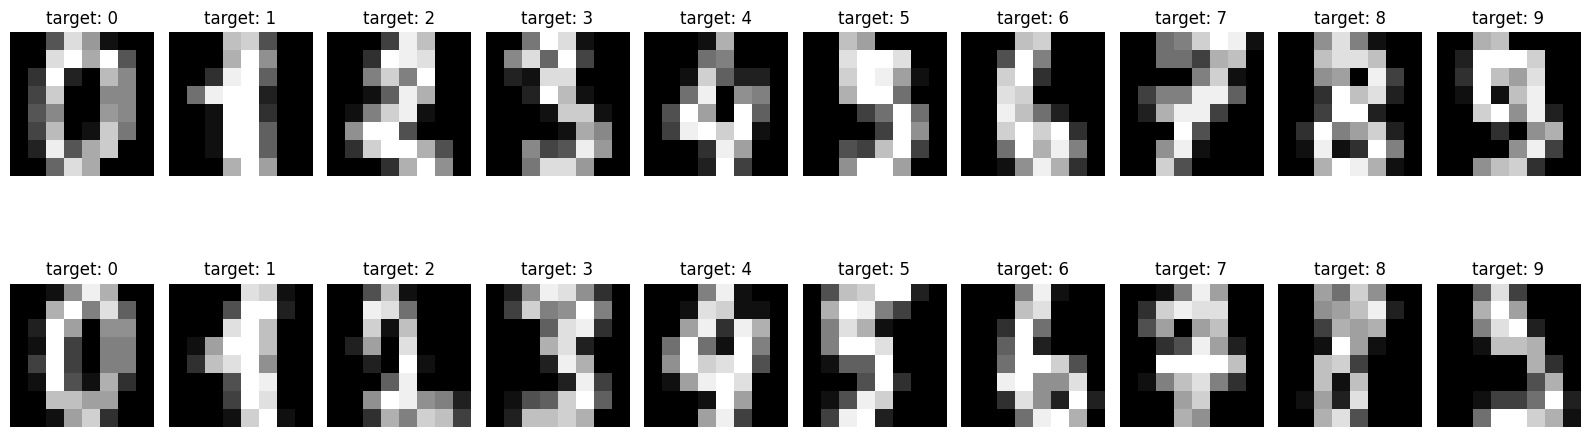

In [4]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
enc.fit(y_train)
y_train = enc.transform(y_train)


In [12]:
@jit
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + jnp.exp(-1.0 * x))

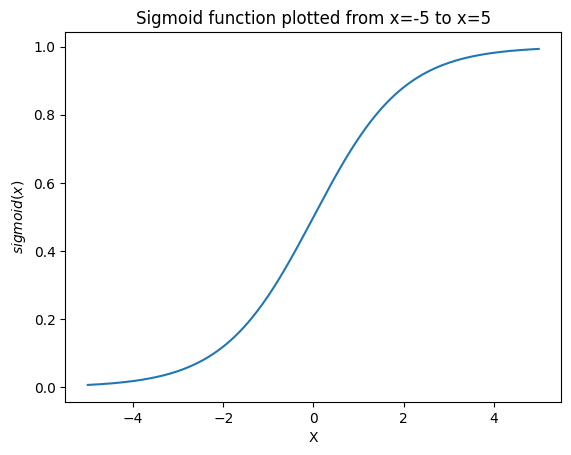

In [13]:
plt.plot(jnp.arange(-5, 5, 0.01),
         sigmoid(jnp.arange(-5, 5, 0.01)));
plt.title("Sigmoid function plotted from x=-5 to x=5")
plt.xlabel("X")
plt.ylabel("$sigmoid(x)$");
# plt.savefig(GRAPHS_IMG_FILEPATH + "05_sigmoid_function.png")

In [14]:
@jit
def softmax(x: ndarray) -> ndarray:
    exps = jnp.exp(x - jnp.max(x, axis=1, keepdims=True))
    return exps / jnp.sum(exps, axis=1, keepdims=True)

In [15]:
@jit
def init_weights(input_size: int,
                 hidden_size: int) -> Dict[str, ndarray]:
    '''
    Initialize weights during the forward pass for step-by-step neural network model.
    '''
    weights: Dict[str, ndarray] = {}
    weights['W1'] = jnp.random.randn(input_size, hidden_size)
    weights['B1'] = jnp.random.randn(1, hidden_size)
    weights['W2'] = jnp.random.randn(hidden_size, 10)
    weights['B2'] = jnp.random.randn(1, 1)
    return weights

In [ ]:
def soft_forward_loss(X: ndarray, y: ndarray, weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Compute the forward pass and the loss for the step-by-step
    neural network model.
    '''
    M1 = jnp.dot(X, weights['W1'])
    N1 = M1 + weights['B1']
    O1 = sigmoid(N1)
    M2 = jnp.dot(O1, weights['W2'])
    N2 = M2 + weights['B2']
    P = softmax(N2)  # Using softmax for the output layer

    # Cross-entropy loss
    loss = -jnp.mean(np.sum(y * jnp.log(P + 1e-10), axis=1))  # Adding small value to avoid log(0)

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['N2'] = N2
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [ ]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute the partial derivatives of the loss with respect to each of the parameters in the neural network.
    '''
    W1 = weights['W1']
    M1 = jnp.dot(X, W1)
    N1 = M1 + weights['B1']
    O1 = sigmoid(N1)
    M2 = jnp.dot(O1, weights['W2'])
    N2 = M2 + weights['B2']
    P = softmax(N2)  # Using softmax for the output layer



    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)

    return loss_gradients